# Comparative Evaluation of Random Forest, LSTM, and Transformer Models
This notebook compares the predictive performance of three forecasting approaches (RF, LSTM, Transformer)
using aggregated test-set error metrics (RMSE and MAPE) over the full 24-hour forecast horizon.

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Input Metrics (Aggregated Test Performance)

The following table contains the overall test metrics for each model.
Values are aggregated across all forecast horizons (h = 1…24).

In [1]:
# Summary of Model Performance Metrics
metrics = [
    {"Model": "Random Forest", "RMSE_MWh": 2363.02, "MAPE_pct": 3.02},
    {"Model": "LSTM",         "RMSE_MWh": 2482.11, "MAPE_pct": 3.16},
    {"Model": "Transformer",  "RMSE_MWh": 2685.20, "MAPE_pct": 3.79},
]

## Ranking by Error Metric

Models are ranked separately by RMSE and MAPE to highlight potential trade-offs between absolute and relative error.

In [4]:
comparison_df = pd.DataFrame(metrics).set_index("Model")
display(comparison_df)

,RMSE_MWh,MAPE_pct
Model,,
Random Forest,2363.02,3.02
LSTM,2482.11,3.16
Transformer,2685.20,3.79


## Relative Differences vs. Best Model

To improve interpretability, the relative increase in RMSE and MAPE compared to the best-performing model
(per metric) is reported in percent.

In [7]:
rmse_rank = comparison_df.sort_values("RMSE_MWh")
mape_rank = comparison_df.sort_values("MAPE_pct")

print("Ranking by RMSE:")
display(rmse_rank)

print("Ranking by MAPE:")
display(mape_rank)

Ranking by RMSE:


,RMSE_MWh,MAPE_pct
Model,,
Random Forest,2363.02,3.02
LSTM,2482.11,3.16
Transformer,2685.20,3.79


Ranking by MAPE:


,RMSE_MWh,MAPE_pct
Model,,
Random Forest,2363.02,3.02
LSTM,2482.11,3.16
Transformer,2685.20,3.79


In [ ]:
# relative deltas vs best (per metric)
rel_df = comparison_df.copy()
rel_df["RMSE_vs_best_%"] = (rel_df["RMSE_MWh"] / comparison_df["RMSE_MWh"].min() - 1) * 100
rel_df["MAPE_vs_best_%"] = (rel_df["MAPE_pct"] / comparison_df["MAPE_pct"].min() - 1) * 100

display(rel_df[["RMSE_MWh", "RMSE_vs_best_%", "MAPE_pct", "MAPE_vs_best_%"]].sort_values("RMSE_MWh"))

## Visualization of Overall Test Performance

Bar charts summarize the overall RMSE and MAPE for each model.


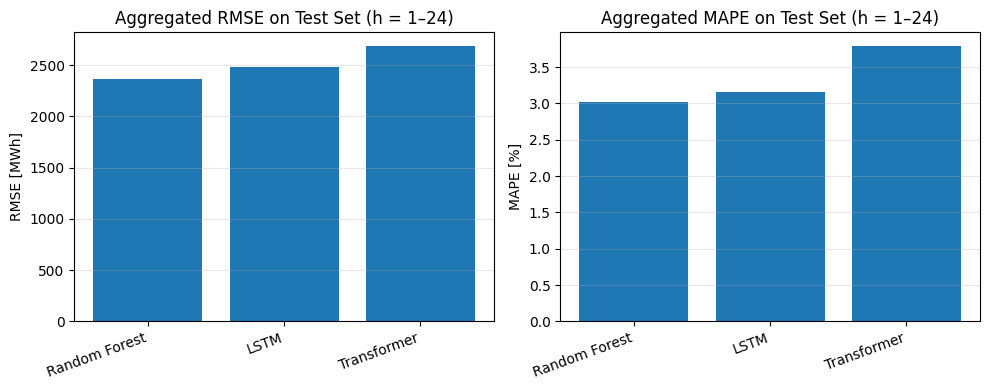

Lowest aggregated RMSE is achieved by Random Forest (2363.02 MWh).
Lowest aggregated MAPE is achieved by Random Forest (3.02%).


In [10]:
# bar plots
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(rmse_rank.index, rmse_rank["RMSE_MWh"])
plt.title("Aggregated RMSE on Test Set (h = 1–24)")
plt.ylabel("RMSE [MWh]")
plt.xticks(rotation=20, ha="right")
plt.grid(axis="y", alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(mape_rank.index, mape_rank["MAPE_pct"])
plt.title("Aggregated MAPE on Test Set (h = 1–24)")
plt.ylabel("MAPE [%]")
plt.xticks(rotation=20, ha="right")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# summary text
best_rmse_model = comparison_df["RMSE_MWh"].idxmin()
best_mape_model = comparison_df["MAPE_pct"].idxmin()

summary_lines = [
    f"Lowest aggregated RMSE is achieved by {best_rmse_model} "
    f"({comparison_df.loc[best_rmse_model,'RMSE_MWh']:.2f} MWh).",
    f"Lowest aggregated MAPE is achieved by {best_mape_model} "
    f"({comparison_df.loc[best_mape_model,'MAPE_pct']:.2f}%).",
]
print("\n".join(summary_lines))


### Summary of Overall Model Performance

- The **Random Forest** model achieves the **lowest aggregated RMSE and MAPE** on the test set, indicating the strongest overall predictive performance across the full 24-hour forecast horizon.
- The **LSTM** model shows slightly higher error values compared to the Random Forest but remains competitive, particularly with respect to relative error (MAPE).
- The **Transformer** model exhibits the highest aggregated error metrics among the three approaches, suggesting weaker overall performance in this experimental setup.